In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
num = 1

In [4]:
#train = pd.read_csv('0424new_train_'+str(num)+'.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'.csv')

In [5]:
#train = pd.read_csv('0424new_train_'+str(num)+'bb.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'bb.csv')

In [6]:
#train = pd.read_csv('0424new_train_'+str(num)+'cc.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'cc.csv')

In [7]:
#train = pd.read_csv('0427new_train_'+str(num)+'.csv')
#test = pd.read_csv('0427new_test_'+str(num)+'.csv')

In [8]:
train = pd.read_csv('0503new_train_'+str(num)+'_change.csv')
test = pd.read_csv('0503new_test_'+str(num)+'_change.csv')

In [9]:
#train = pd.read_csv('0504new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0504new_test_'+str(num)+'_change.csv')

In [10]:
#train = pd.read_csv('0505new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0505new_test_'+str(num)+'_change.csv')

In [11]:
#train = pd.read_csv('0424upsample.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'dd.csv')

In [12]:
#train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)
#test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)

In [13]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [14]:
train = shuffle(train)
#test = shuffle(test)

In [15]:
#test

In [16]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [17]:
#train_feature

In [18]:
#test.reset_index( drop=True, inplace=True )
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [19]:
new_all_feature = preprocessing.scale(train_feature)
test_feature  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [20]:
#new_all_feature

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [22]:
model = tf.keras.models.Sequential()

In [23]:
model.add( tf.keras.layers.Dense(units=64, input_shape=[40],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [24]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [25]:
model.add(tf.keras.layers.Dense(units=32,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [26]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [27]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.07),   #0.06  #0.07
##               kernel_regularizer= regularizers.l1_l2(0.07),           
##               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [28]:
#model.add(tf.keras.layers.Dropout(0.2))  #ep 100

In [29]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [30]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )
#adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [31]:
#sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.01, nesterov=False)

In [32]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
#model.compile( optimizer = sgd , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_history = model.fit(new_all_feature , train_y,  
                          epochs = 500, batch_size = 15, verbose=1)   #一層500  三層1500 #15  #150 epoch

Epoch 1/500
171/171 [==============================]171/171 [==============================] - 0s 1ms/step - loss: 16.1176 - acc: 0.3216

Epoch 2/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 15.0592 - acc: 0.3099

Epoch 3/500
171/171 [==============================]171/171 [==============================] - 0s 117us/step - loss: 13.7042 - acc: 0.4269

Epoch 4/500
171/171 [==============================]171/171 [==============================] - 0s 127us/step - loss: 12.7731 - acc: 0.4211

Epoch 5/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 11.8099 - acc: 0.4678

Epoch 6/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 10.9968 - acc: 0.4035

Epoch 7/500
171/171 [==============================]171/171 [==============================] - 0s 117us/step - loss: 10.0978 - acc: 0.4795

Epoch 8/500
171/171 [=

171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.1398 - acc: 0.6257

Epoch 60/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.1543 - acc: 0.6257

Epoch 61/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.1477 - acc: 0.6199

Epoch 62/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.1430 - acc: 0.6374

Epoch 63/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.1269 - acc: 0.6550

Epoch 64/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.1336 - acc: 0.6023

Epoch 65/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.1282 - acc: 0.6082

Epoch 66/500
171/171 [==================

171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0524 - acc: 0.6433

Epoch 118/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0442 - acc: 0.6316

Epoch 119/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.0261 - acc: 0.6725

Epoch 120/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0432 - acc: 0.6316

Epoch 121/500
171/171 [==============================]171/171 [==============================] - 0s 88us/step - loss: 1.0328 - acc: 0.6491

Epoch 122/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0309 - acc: 0.6374

Epoch 123/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.0600 - acc: 0.6901

Epoch 124/500
171/171 [===========

171/171 [==============================]171/171 [==============================] - 0s 90us/step - loss: 1.0237 - acc: 0.6667

Epoch 176/500
171/171 [==============================]171/171 [==============================] - 0s 92us/step - loss: 1.0166 - acc: 0.6901

Epoch 177/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0071 - acc: 0.6784

Epoch 178/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0184 - acc: 0.6725

Epoch 179/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0543 - acc: 0.6491

Epoch 180/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0225 - acc: 0.6725

Epoch 181/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 1.0372 - acc: 0.6550

Epoch 182/500
171/171 [===========

171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0111 - acc: 0.6608

Epoch 234/500
171/171 [==============================]171/171 [==============================] - 0s 88us/step - loss: 0.9535 - acc: 0.6901

Epoch 235/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.9717 - acc: 0.6959

Epoch 236/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9813 - acc: 0.7076

Epoch 237/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.9695 - acc: 0.6842

Epoch 238/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.9724 - acc: 0.7135

Epoch 239/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 1.0019 - acc: 0.6725

Epoch 240/500
171/171 [===========

171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9292 - acc: 0.7135

Epoch 292/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9054 - acc: 0.7076

Epoch 293/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9249 - acc: 0.7427

Epoch 294/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.9672 - acc: 0.6959

Epoch 295/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9755 - acc: 0.7018

Epoch 296/500
171/171 [==============================]171/171 [==============================] - 0s 82us/step - loss: 0.9318 - acc: 0.7368

Epoch 297/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9512 - acc: 0.7193

Epoch 298/500
171/171 [===========

171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.9344 - acc: 0.7427

Epoch 350/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9014 - acc: 0.7661

Epoch 351/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8908 - acc: 0.7427

Epoch 352/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9415 - acc: 0.7310

Epoch 353/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9143 - acc: 0.7719

Epoch 354/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8831 - acc: 0.7544

Epoch 355/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.9322 - acc: 0.7485

Epoch 356/500
171/171 [===========

171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8650 - acc: 0.7544

Epoch 408/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8846 - acc: 0.7368

Epoch 409/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8671 - acc: 0.7427

Epoch 410/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8552 - acc: 0.7778

Epoch 411/500
171/171 [==============================]171/171 [==============================] - 0s 88us/step - loss: 0.8689 - acc: 0.7778

Epoch 412/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8826 - acc: 0.7836

Epoch 413/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8581 - acc: 0.7661

Epoch 414/500
171/171 [===========

171/171 [==============================]171/171 [==============================] - 0s 82us/step - loss: 0.8300 - acc: 0.7719

Epoch 466/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8123 - acc: 0.7953

Epoch 467/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8488 - acc: 0.7953

Epoch 468/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8198 - acc: 0.8363

Epoch 469/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8285 - acc: 0.7895

Epoch 470/500
171/171 [==============================]171/171 [==============================] - 0s 87us/step - loss: 0.8045 - acc: 0.8187

Epoch 471/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8038 - acc: 0.8070

Epoch 472/500
171/171 [===========

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train):
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

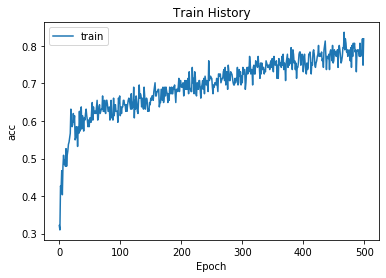

In [36]:
show_train_history(train_history,'acc')

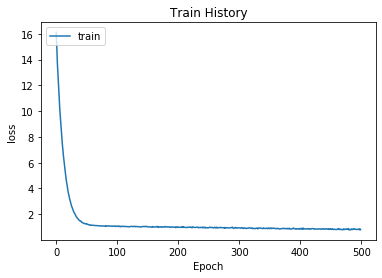

In [37]:
show_train_history(train_history,'loss')

In [38]:
test_out =  model.predict_classes(test_feature)

In [39]:
test_out

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [40]:
prob = model.predict_proba(test_feature)

In [41]:
prob[0:10]

array([[3.67713898e-01, 3.91751945e-01, 1.53717682e-01, 8.68164822e-02],
       [7.13120341e-01, 2.01404497e-01, 4.51815352e-02, 4.02936824e-02],
       [9.92548704e-01, 5.05351787e-03, 6.85991312e-04, 1.71171443e-03],
       [3.29297543e-01, 2.74862826e-01, 2.64844149e-01, 1.30995497e-01],
       [3.77541870e-01, 3.15584540e-01, 1.98243901e-01, 1.08629733e-01],
       [4.92680758e-01, 1.23572871e-01, 2.47182399e-01, 1.36564046e-01],
       [6.38046026e-01, 1.18191987e-01, 1.45926625e-01, 9.78353396e-02],
       [9.33867633e-01, 3.23060043e-02, 1.50470911e-02, 1.87791847e-02],
       [8.09784174e-01, 1.04680955e-01, 4.47897799e-02, 4.07451130e-02],
       [9.23919618e-01, 6.76978752e-02, 3.17491218e-03, 5.20766014e-03]],
      dtype=float32)

In [42]:
prob[10:16]

array([[0.6791798 , 0.30525422, 0.00684331, 0.00872273],
       [0.06684659, 0.6201299 , 0.23300381, 0.0800197 ],
       [0.48402226, 0.31730348, 0.12027711, 0.07839718],
       [0.97724086, 0.01332642, 0.00344591, 0.00598673],
       [0.34084857, 0.45093894, 0.1319054 , 0.07630707],
       [0.05102082, 0.60165596, 0.26337263, 0.0839506 ]], dtype=float32)

In [43]:
prob[16:]

array([[0.15094131, 0.57818484, 0.18777731, 0.08309648],
       [0.00173193, 0.92901355, 0.05793582, 0.0113186 ],
       [0.20353974, 0.52332425, 0.1856323 , 0.08750368],
       [0.09476378, 0.7058742 , 0.1409103 , 0.05845167]], dtype=float32)

In [44]:
test['HOSDAY'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3])

In [45]:
pd.crosstab( test['HOSDAY'].values, test_out, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,9,1
1,3,3
2,0,3
3,0,1


In [46]:
score2 = model.evaluate(test_feature, test_y, verbose=2)
score2

[1.3538249731063843, 0.6000000238418579]

In [47]:
#model.save('gggood.h5')

In [48]:
#model2 = tf.contrib.keras.models.load_model('ggg.h5')

In [49]:
#scores = model2.evaluate(test_feature, test_y, verbose=2)

In [50]:
#scores

In [51]:
#model3 = tf.contrib.keras.models.load_model('gggood.h5')

In [52]:
#scores3 = model3.evaluate(test_feature, test_y, verbose=2)

In [53]:
#scores3